Feature selection is the process of identifying and selecting a subset of input variables that are most relevant to the target variable.

There are two popular feature selection techniques that can be used for numerical input data and a numerical target variable.

1. Correlation Statistics.
    Correlation is a measure of how two variables are correlated with each other. Linear correlation scores are typically a value between -1 and 1 with 0 representing no relationship. The scikit-learn machine library provides an implementation of the correlation statistic in the f_regression() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.
2. Mutual Information Statistics.

We will use make_regression() function from the scikit-learn library to define a dataset.

In [22]:
#Libraries required
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

In [5]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


In [15]:
X_train[1:3]

array([[ 1.22061041, -0.12372995,  0.98517399, -0.01073617, -0.0225373 ,
         0.31377031,  1.4707535 , -1.30626946,  1.58121384, -0.98103428,
         0.46970525, -0.16218315, -0.94615899, -0.79705145,  0.25760131,
        -0.15620579,  1.11308724, -1.27138319,  0.735483  ,  0.27213663,
        -0.15606039,  0.22520712, -0.73227653, -0.41045489, -0.60862088,
         0.94517546, -0.73431389,  0.49927032, -0.41827823, -0.20764665,
        -0.29100974, -0.47489641, -0.94139811, -1.71322645, -2.42360252,
         0.24170014, -0.92381108, -0.76789261,  1.48541437, -1.05145461,
         0.63767332, -0.34553078, -0.52136911, -1.14233402,  0.50986128,
         0.51392829,  0.69658871, -1.63009336,  0.30546508, -0.3288328 ,
        -0.52478281,  1.33083569, -0.78488165,  1.53386198, -0.51211316,
         1.05980748, -0.93591717,  0.47526265,  0.69099671,  0.14389205,
         2.03942159, -0.14037651, -0.92454119, -0.10502119,  1.35105406,
        -0.38069612, -2.05982683, -0.7491516 , -1.7

In [16]:
y_train[1:3]

array([-95.67864932, -27.37209012])

In [8]:
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [9]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [20]:
print(X_train_fs.shape)
print(X_train.shape)

(670, 100)
(670, 100)


We can plot scores for each variable so that we can get idea of how a feature is correlated with the target. Higher correlation is better.

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

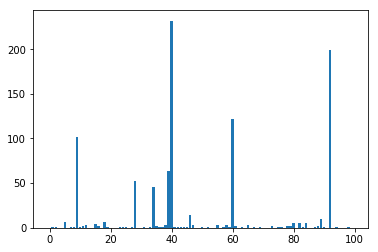

In [21]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the mutual_info_regression() function.

In [23]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [24]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

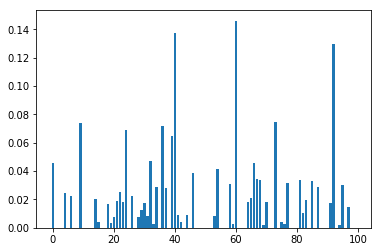

In [25]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()